# Detecting Habitable Planets with Machine Learning
José Moraes de Albuquerque Neto </p>
Michigan State University

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Exploring the habitable planet data:

In [2]:
habitable_planets = pd.read_csv('habitable_planets_detailed_list.csv')
habitable_planets

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,2038,8890150,K02650.01,Kepler-395 c,CONFIRMED,Active,2017-05-10,CANDIDATE,0.985,0,...,-0.50,0.56,0.53,0.57,0.39,0.37,-0.26,0.48,0.47,0.43
1,4688,6497146,K03284.01,Kepler-438 b,CONFIRMED,Active,2017-05-10,CANDIDATE,1.000,0,...,-0.03,0.33,0.28,0.42,-0.48,0.42,0.00,0.33,0.48,0.42
2,7542,9480398,K07179.01,NaN,CANDIDATE,Active,2015-09-18,CANDIDATE,NaN,0,...,0.90,2.60,1.90,3.00,1.80,2.70,0.90,4.30,2.10,4.50
3,2617,3642335,K03010.01,Kepler-1410 b,CONFIRMED,Active,2017-05-10,CANDIDATE,0.996,0,...,-0.56,0.73,0.62,0.79,0.51,0.48,-0.21,0.37,0.55,0.47
4,4649,4138008,K04742.01,Kepler-442 b,CONFIRMED,Active,2017-05-10,CANDIDATE,0.993,0,...,-0.11,0.60,0.19,0.89,0.21,0.79,-0.45,0.86,0.50,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,9180,9084569,K07923.01,NaN,CANDIDATE,Active,2017-05-10,CANDIDATE,0.750,0,...,-0.24,0.60,1.50,1.60,1.30,1.40,-0.33,0.63,1.40,1.50
122,9362,9650762,K07954.01,NaN,CANDIDATE,Active,2017-05-10,CANDIDATE,0.839,0,...,-1.80,0.26,1.92,0.26,-0.52,0.30,-1.73,0.26,1.81,0.26
123,9001,10331279,K08000.01,NaN,CANDIDATE,Active,2017-05-10,CANDIDATE,0.975,0,...,0.10,1.10,1.60,1.10,-1.60,1.00,0.05,0.59,1.60,1.00
124,9064,10452252,K08012.01,NaN,CANDIDATE,Active,2017-05-10,CANDIDATE,0.989,0,...,0.18,0.76,0.18,0.71,0.05,0.93,1.51,0.70,1.51,0.71


## Non-habitable planet data:

In [3]:
non_habitable_planets = pd.read_csv('non_habitable_planets_confirmed_detailed_list.csv')
non_habitable_planets

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Active,2017-05-10,CANDIDATE,1.000,0,...,0.20,0.16,0.20,0.17,0.08,0.13,0.31,0.17,0.32,0.16
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Active,2017-05-10,CANDIDATE,0.969,0,...,0.00,0.48,0.39,0.36,0.49,0.34,0.12,0.73,0.50,0.45
2,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Active,2017-05-10,CANDIDATE,1.000,0,...,-0.09,0.18,0.10,0.14,0.07,0.18,0.02,0.16,0.07,0.20
3,6,10872983,K00756.01,Kepler-228 d,CONFIRMED,Active,2017-05-10,CANDIDATE,1.000,0,...,-0.07,0.11,0.08,0.13,-0.02,0.13,-0.08,0.10,0.08,0.10
4,7,10872983,K00756.02,Kepler-228 c,CONFIRMED,Active,2017-05-10,CANDIDATE,1.000,0,...,0.09,0.16,0.26,0.16,0.18,0.15,0.06,0.15,0.19,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,9310,7347246,K03014.01,Kepler-1411 b,CONFIRMED,Active,2017-05-10,CANDIDATE,0.941,0,...,0.05,0.32,0.17,0.34,0.07,0.29,-0.03,0.31,0.07,0.35
2242,9354,8895758,K03106.01,Kepler-1427 b,CONFIRMED,Active,2017-05-10,CANDIDATE,0.877,0,...,-0.74,0.59,0.75,0.60,0.14,0.38,-0.64,0.56,0.65,0.57
2243,9356,6196457,K00285.03,Kepler-92 d,CONFIRMED,Active,2017-05-10,FALSE POSITIVE,0.476,1,...,-0.47,0.48,0.56,0.42,-0.17,0.20,-0.28,0.49,0.32,0.43
2244,9480,7503885,K03417.01,Kepler-1494 b,CONFIRMED,Active,2017-05-10,CANDIDATE,1.000,0,...,-0.17,0.35,0.21,0.59,-0.10,0.64,0.02,0.39,0.11,0.56


In [4]:
# Adding a new column to each dataset. Habitable = 1, non-habitable = 0
habitable_planets['habitable'] = 1
non_habitable_planets['habitable'] = 0

# Combining the datasets
combined_df = pd.concat([habitable_planets, non_habitable_planets], ignore_index=True)
combined_df

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err,habitable
0,2038,8890150,K02650.01,Kepler-395 c,CONFIRMED,Active,2017-05-10,CANDIDATE,0.985,0,...,0.56,0.53,0.57,0.39,0.37,-0.26,0.48,0.47,0.43,1
1,4688,6497146,K03284.01,Kepler-438 b,CONFIRMED,Active,2017-05-10,CANDIDATE,1.000,0,...,0.33,0.28,0.42,-0.48,0.42,0.00,0.33,0.48,0.42,1
2,7542,9480398,K07179.01,NaN,CANDIDATE,Active,2015-09-18,CANDIDATE,NaN,0,...,2.60,1.90,3.00,1.80,2.70,0.90,4.30,2.10,4.50,1
3,2617,3642335,K03010.01,Kepler-1410 b,CONFIRMED,Active,2017-05-10,CANDIDATE,0.996,0,...,0.73,0.62,0.79,0.51,0.48,-0.21,0.37,0.55,0.47,1
4,4649,4138008,K04742.01,Kepler-442 b,CONFIRMED,Active,2017-05-10,CANDIDATE,0.993,0,...,0.60,0.19,0.89,0.21,0.79,-0.45,0.86,0.50,0.84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367,9310,7347246,K03014.01,Kepler-1411 b,CONFIRMED,Active,2017-05-10,CANDIDATE,0.941,0,...,0.32,0.17,0.34,0.07,0.29,-0.03,0.31,0.07,0.35,0
2368,9354,8895758,K03106.01,Kepler-1427 b,CONFIRMED,Active,2017-05-10,CANDIDATE,0.877,0,...,0.59,0.75,0.60,0.14,0.38,-0.64,0.56,0.65,0.57,0
2369,9356,6196457,K00285.03,Kepler-92 d,CONFIRMED,Active,2017-05-10,FALSE POSITIVE,0.476,1,...,0.48,0.56,0.42,-0.17,0.20,-0.28,0.49,0.32,0.43,0
2370,9480,7503885,K03417.01,Kepler-1494 b,CONFIRMED,Active,2017-05-10,CANDIDATE,1.000,0,...,0.35,0.21,0.59,-0.10,0.64,0.02,0.39,0.11,0.56,0


In [5]:
# My idea is heavily inspired from towardsdatascience.com/detecting-habitability-of-exoplanets-with-machine-learning-b28c2d825760
# Access in November 21, 2023

# Dropping columns with high percentage of missing values (50%) - just like the author of the article did
threshold = 0.5 * len(combined_df)
machinelearning_df = combined_df.dropna(thresh=threshold, axis=1)

# Dropping irrelevant features
irrelevant_features = ['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_vet_stat', 'koi_vet_date', 'koi_pdisposition']
machinelearning_df = machinelearning_df.drop(columns=irrelevant_features)

# Removing non-numeric columns
non_numeric_columns = machinelearning_df.select_dtypes(include=['object']).columns
machinelearning_df = machinelearning_df.drop(columns=non_numeric_columns)

# Dropping rows with any missing values
machinelearning_df = machinelearning_df.dropna()

# Splitting the dataset into training and testing sets
X = machinelearning_df.drop('habitable', axis=1)
y = machinelearning_df['habitable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

# Scaling Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Some models - Inspired on the article's table
svm_model = SVC(random_state=50)
decision_tree_model = DecisionTreeClassifier(random_state=50)
random_forest_model = RandomForestClassifier(random_state=50)
logistic_regression_model = LogisticRegression(random_state=50)

# Training these models
svm_model.fit(X_train_scaled, y_train)
decision_tree_model.fit(X_train_scaled, y_train)
random_forest_model.fit(X_train_scaled, y_train)
logistic_regression_model.fit(X_train_scaled, y_train)

# Getting the predictions of the trained models
svm_predictions = svm_model.predict(X_test_scaled)
decision_tree_predictions = decision_tree_model.predict(X_test_scaled)
random_forest_predictions = random_forest_model.predict(X_test_scaled)
logistic_regression_predictions = logistic_regression_model.predict(X_test_scaled)

# Evaluating them
models = ['SVM', 'Decision Tree', 'Random Forest', 'Logistic Regression']
predictions = [svm_predictions, decision_tree_predictions, random_forest_predictions, logistic_regression_predictions]

# Metrics dictionary
evaluation_metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Metrics for each model
for model_name, model_predictions in zip(models, predictions):
    evaluation_metrics['Model'].append(model_name)
    evaluation_metrics['Accuracy'].append(accuracy_score(y_test, model_predictions))
    evaluation_metrics['Precision'].append(precision_score(y_test, model_predictions))
    evaluation_metrics['Recall'].append(recall_score(y_test, model_predictions))
    evaluation_metrics['F1 Score'].append(f1_score(y_test, model_predictions))

# Converting the evaluation metrics to a DataFrame
evaluation_df = pd.DataFrame(evaluation_metrics)
evaluation_df

C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Precision,Recall,F1 Score
0,SVM,0.968284,0.941176,0.50000,0.653061
1,Decision Tree,0.986940,0.962963,0.81250,0.881356
2,Random Forest,0.990672,0.965517,0.87500,0.918033
3,Logistic Regression,0.977612,0.833333,0.78125,0.806452


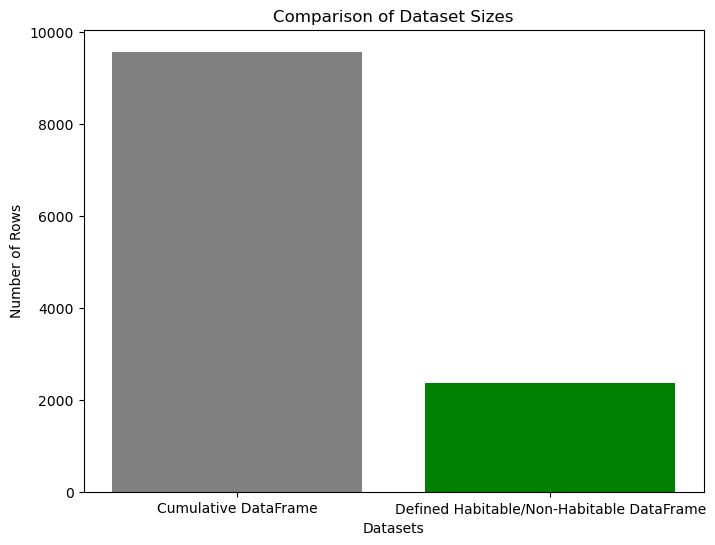

In [6]:
# Sizes (based on the number of rows) of each dataset
df = pd.read_csv('cumulative.csv')
size_df = len(df)
size_combined_df = len(combined_df)

# Data for plotting
datasets = ['Cumulative DataFrame', 'Defined Habitable/Non-Habitable DataFrame']
sizes = [size_df, size_combined_df]

# Creating the bar graphs
plt.figure(figsize=(8, 6))
plt.bar(datasets, sizes, color=['gray', 'green'])
plt.title('Comparison of Dataset Sizes')
plt.xlabel('Datasets')
plt.ylabel('Number of Rows')
plt.show()

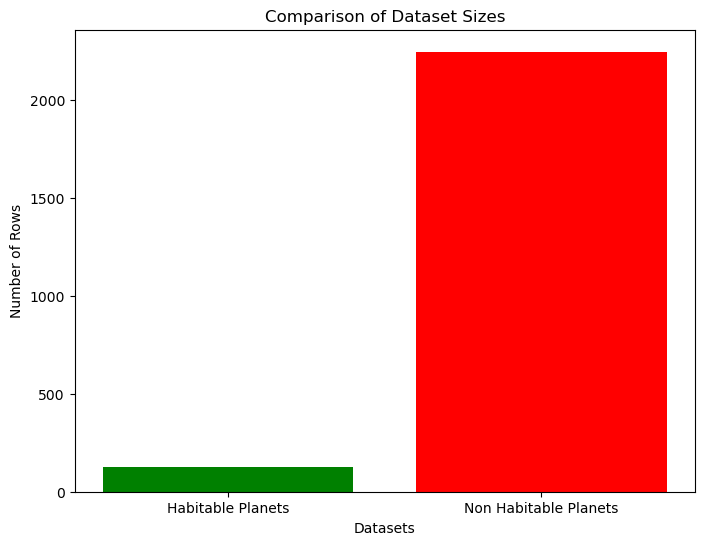

126


In [7]:
size_habitable = len(habitable_planets)
size_not = len(non_habitable_planets)

# Data for plotting
datasets = ['Habitable Planets', 'Non Habitable Planets']
sizes = [size_habitable, size_not]

# Creating the bar graphs
plt.figure(figsize=(8, 6))
plt.bar(datasets, sizes, color=['green', 'red'])
plt.title('Comparison of Dataset Sizes')
plt.xlabel('Datasets')
plt.ylabel('Number of Rows')
plt.show()

print(size_habitable)

## Working on joining the two datasets (in order to make predictions):

In [8]:
cumulative_exoplanets = pd.read_csv('cumulative.csv', delimiter = ',')
cumulative_exoplanets

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,0,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


### Cleaning data:

In [9]:
# Only getting CANDIDATE and CONFIRMED exoplanets
cumulative_exoplanets = cumulative_exoplanets[cumulative_exoplanets['koi_disposition'] != 'FALSE POSITIVE']

In [10]:
# Merging the two DataFrames using only the common columns
common_columns = cumulative_exoplanets.columns.intersection(combined_df.columns)
merged_df = pd.merge(cumulative_exoplanets[common_columns], combined_df[common_columns], how="outer")

In [11]:
# Working on creating a 'habitable' column in the merged_df
new_ml_df = combined_df[common_columns]
new_ml_df['habitable'] = combined_df['habitable']

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_16568\1073972934.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_ml_df['habitable'] = combined_df['habitable']


In [12]:
merged_df['habitable'] = new_ml_df['habitable']
merged_df

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,habitable
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1.0
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1.0
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1.0
3,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1.0
4,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4824,5437945,K03791.01,Kepler-460 b,CONFIRMED,FALSE POSITIVE,0.000,0,1,0,0,...,4.163,0.246,-0.164,1.393,0.385,-0.385,288.47485,40.651360,13.771,NaN
4825,7515679,K03728.01,Kepler-1517 b,CONFIRMED,FALSE POSITIVE,0.000,0,1,0,0,...,3.538,0.580,-0.061,4.037,0.400,-2.266,287.80722,43.188782,12.252,NaN
4826,7731281,K05416.01,Kepler-1628 b,CONFIRMED,FALSE POSITIVE,0.000,1,0,0,0,...,4.674,0.068,-0.023,0.584,0.037,-0.074,281.63370,43.411579,16.595,NaN
4827,7935997,K05447.02,Kepler-1629 b,CONFIRMED,FALSE POSITIVE,0.000,1,0,0,0,...,4.541,0.013,-0.117,0.893,0.125,-0.033,280.20660,43.774288,12.750,NaN


## Data Preparation for the ML trainings and evaluations
Note that my approach is heavily dependant on KNN to circumvent the NaN values.
I tried to make my code in a "Plug and Play" format, so that we just need to import and code a little bit.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Selecting only the numeric columns and creating a new DataFrame
numeric_columns = merged_df.select_dtypes(include=['number'])
numeric_df = merged_df[numeric_columns.columns]

# Separating between known habitable and missing habitable. This is important to deal of NaNs (and to predict habitability, duh)
known_habitable = numeric_df.dropna(subset=['habitable'])
missing_habitable = numeric_df[numeric_df['habitable'].isna()]

# Creating the features and target variables (for known Habitable values)
X_known = known_habitable.drop(columns=['habitable']) 
y_known = known_habitable['habitable'] 

X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, 
                                                    test_size=0.25, 
                                                    random_state=50)

# Scaling the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Working around the missing values with KNN (Thank you, Ishita Kokil! Ishita Kokil gave this Idea in the in-class presentations)
knn_imputer = KNNImputer(n_neighbors=10)
X_train_imputed = knn_imputer.fit_transform(X_train_scaled)
X_test_imputed = knn_imputer.transform(X_test_scaled)

X_missing = missing_habitable.drop(columns=['habitable'])
X_missing_scaled = scaler.transform(X_missing)
X_missing_imputed = knn_imputer.transform(X_missing_scaled)

C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


### Exploring ML Algorithms
After testing my approach with the Random Forest and the data preparation with KNN, I decided to use other classifiers. 

#### Random Forest

In [14]:
# I first chose the random forest model because it was the most successfull way up when I was starting the project.
random_forest_model = RandomForestClassifier(random_state=50)
random_forest_model.fit(X_train_imputed, y_train)

# Commented out (I decided to explore other models and only do the new DataFrame in the end)
# Predicting the values in the columns
# missing_habitable['habitable'] = random_forest_model.predict(X_missing_imputed)

# Concatenating the two DataFrames we had created earlier
# predicted_habitable = pd.concat([known_habitable, missing_habitable])

# Sort the DataFrame by index (we don't want to mess up the original order)
# predicted_habitable.sort_index(inplace=True)

# Predicting on the test set
y_pred = random_forest_model.predict(X_test_imputed)

# Calculating metrics and print them
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Precision (KNN + Random Forest):", precision)
print("Recall (KNN + Random Forest):", recall)
print("F1 Score (KNN + Random Forest):", f1)
print("Accuracy (KNN + Random Forest):", accuracy)

Precision (KNN + Random Forest): 1.0
Recall (KNN + Random Forest): 0.07894736842105263
F1 Score (KNN + Random Forest): 0.14634146341463414
Accuracy (KNN + Random Forest): 0.9409780775716695


#### Trying a Perceptron Model
"What if it is any better?"

In [15]:
from sklearn.linear_model import Perceptron
# Perceptron model
perceptron_model = Perceptron(random_state=50)
perceptron_model.fit(X_train_imputed, y_train)

# Predicting on the test set
y_pred = perceptron_model.predict(X_test_imputed)

# Calculating metrics and print them
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy (Perceptron):", accuracy)
print("Precision (Perceptron):", precision)
print("Recall (Perceptron):", recall)
print("F1 Score (Perceptron):", f1)


Accuracy (Perceptron): 0.9072512647554806
Precision (Perceptron): 0.2571428571428571
Recall (Perceptron): 0.23684210526315788
F1 Score (Perceptron): 0.2465753424657534


#### Logistic Regression

In [16]:
# Create and fit the Logistic Regression model
logistic_model = LogisticRegression(random_state=50)
logistic_model.fit(X_train_imputed, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test_imputed)

# Calculating metrics and print them
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Precision (Logistic Regression):", precision)
print("Recall (Logistic Regression):", recall)
print("F1 Score (Logistic Regression):", f1)
print("Accuracy (Logistic Regression):", accuracy)


Precision (Logistic Regression): 0.5
Recall (Logistic Regression): 0.02631578947368421
F1 Score (Logistic Regression): 0.05
Accuracy (Logistic Regression): 0.9359190556492412


#### SVM

In [17]:
# Create and fit the Support Vector Machine (SVM) model
svm_model = SVC(random_state=50)
svm_model.fit(X_train_imputed, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test_imputed)

# Calculate metrics and print them
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Precision (SVM):", precision)
print("Recall (SVM):", recall)
print("F1 Score (SVM):", f1)
print("Accuracy (SVM):", accuracy)


Precision (SVM): 0.0
Recall (SVM): 0.0
F1 Score (SVM): 0.0
Accuracy (SVM): 0.9359190556492412


C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Now, using other Classifiers:

#### XGBoost

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Creating and fitting the XGBoost model
xgb_model = XGBClassifier(random_state=50)
xgb_model.fit(X_train_imputed, y_train)

# Predicting on the test set
y_pred = xgb_model.predict(X_test_imputed)

# Calculating metrics and print them
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Precision (XGBoost):", precision)
print("Recall (XGBoost):", recall)
print("F1 Score (XGBoost):", f1)
print("Accuracy (XGBoost):", accuracy)


Precision (XGBoost): 0.9285714285714286
Recall (XGBoost): 0.6842105263157895
F1 Score (XGBoost): 0.7878787878787878
Accuracy (XGBoost): 0.9763912310286678


#### LightGBM 

In [19]:
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Creating and fitting the LightGBM model
lgbm_model = LGBMClassifier(random_state=50)
lgbm_model.fit(X_train_imputed, y_train)

# Predicting on the test set
y_pred = lgbm_model.predict(X_test_imputed)

# Calculating metrics and printingthem
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Precision (LightGBM):", precision)
print("Recall (LightGBM):", recall)
print("F1 Score (LightGBM):", f1)
print("Accuracy (LightGBM):", accuracy)


[LightGBM] [Info] Number of positive: 88, number of negative: 1691
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001674 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8536
[LightGBM] [Info] Number of data points in the train set: 1779, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.049466 -> initscore=-2.955739
[LightGBM] [Info] Start training from score -2.955739
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Precision (LightGBM): 0.9629629629629629
Recall (LightGBM): 0.6842105263157895
F1 Score (LightGBM): 0.7999999999999999
Accuracy (LightGBM): 0.9780775716694773


#### CatBoost

In [20]:
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Create and fit the CatBoost model
params={'verbose': False} 
catboost_model = CatBoostClassifier(random_state=50, verbose = False)
catboost_model.fit(X_train_imputed, y_train)

# Predict on the test set
y_pred = catboost_model.predict(X_test_imputed)

# Calculate metrics and print them
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Precision (CatBoost):", precision)
print("Recall (CatBoost):", recall)
print("F1 Score (CatBoost):", f1)
print("Accuracy (CatBoost):", accuracy)


Precision (CatBoost): 0.9583333333333334
Recall (CatBoost): 0.6052631578947368
F1 Score (CatBoost): 0.7419354838709677
Accuracy (CatBoost): 0.9730185497470489


#### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Create and fit the Decision Tree Classifier model
tree_model = DecisionTreeClassifier(random_state=50)
tree_model.fit(X_train_imputed, y_train)

# Predict on the test set
y_pred = tree_model.predict(X_test_imputed)

# Calculate metrics and print them
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Precision (Decision Tree):", precision)
print("Recall (Decision Tree):", recall)
print("F1 Score (Decision Tree):", f1)
print("Accuracy (Decision Tree):", accuracy)


Precision (Decision Tree): 0.6829268292682927
Recall (Decision Tree): 0.7368421052631579
F1 Score (Decision Tree): 0.7088607594936709
Accuracy (Decision Tree): 0.9612141652613828


#### Gaussian Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Create and fit the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_imputed, y_train)

# Predict on the test set
y_pred = nb_model.predict(X_test_imputed)

# Calculate metrics and print them
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Precision (Naive Bayes):", precision)
print("Recall (Naive Bayes):", recall)
print("F1 Score (Naive Bayes):", f1)
print("Accuracy (Naive Bayes):", accuracy)


Precision (Naive Bayes): 0.07407407407407407
Recall (Naive Bayes): 0.9473684210526315
F1 Score (Naive Bayes): 0.13740458015267176
Accuracy (Naive Bayes): 0.23777403035413153


#### AdaBoost

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Create and fit the AdaBoost Classifier model
adaboost_model = AdaBoostClassifier(random_state=50)
adaboost_model.fit(X_train_imputed, y_train)

# Predict on the test set
y_pred = adaboost_model.predict(X_test_imputed)

# Calculate metrics and print them
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Precision (AdaBoost):", precision)
print("Recall (AdaBoost):", recall)
print("F1 Score (AdaBoost):", f1)
print("Accuracy (AdaBoost):", accuracy)


Precision (AdaBoost): 0.7142857142857143
Recall (AdaBoost): 0.39473684210526316
F1 Score (AdaBoost): 0.5084745762711864
Accuracy (AdaBoost): 0.9510961214165261


## Selecting the best model and creating a new DataFrame with it

In the context of determining exoplanet habitability, it's essential to find a model that not only aligns with the characteristics of the dataset but also produces meaningful and accurate results. I've selected LightGBM as the model that best suits this application

In [24]:
# Predicting the values in the columns with the LightGBM model
missing_habitable['habitable'] = lgbm_model.predict(X_missing_imputed)

# Concatenating the two DataFrames we had created earlier
predicted_habitable = pd.concat([known_habitable, missing_habitable])

# Sort the DataFrame by index (we don't want to mess up the original order)
predicted_habitable.sort_index(inplace=True)


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_16568\2628743822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_habitable['habitable'] = lgbm_model.predict(X_missing_imputed)


In [25]:
predicted_habitable

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,habitable
0,10797460,1.000,0,0,0,0,9.488036,0.000028,-0.000028,170.538750,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1.0
1,10797460,0.969,0,0,0,0,54.418383,0.000248,-0.000248,162.513840,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1.0
2,10811496,0.000,0,0,0,0,19.899140,0.000015,-0.000015,175.850252,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1.0
3,10854555,1.000,0,0,0,0,2.525592,0.000004,-0.000004,171.595550,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1.0
4,10872983,1.000,0,0,0,0,11.094321,0.000020,-0.000020,171.201160,...,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4824,5437945,0.000,0,1,0,0,440.784376,0.000921,-0.000921,139.353500,...,4.163,0.246,-0.164,1.393,0.385,-0.385,288.47485,40.651360,13.771,0.0
4825,7515679,0.000,0,1,0,0,5.546083,0.000008,-0.000008,133.503480,...,3.538,0.580,-0.061,4.037,0.400,-2.266,287.80722,43.188782,12.252,0.0
4826,7731281,0.000,1,0,0,0,76.377855,0.001825,-0.001825,146.348500,...,4.674,0.068,-0.023,0.584,0.037,-0.074,281.63370,43.411579,16.595,0.0
4827,7935997,0.000,1,0,0,0,3.875943,0.000027,-0.000027,134.847580,...,4.541,0.013,-0.117,0.893,0.125,-0.033,280.20660,43.774288,12.750,0.0


In [26]:
# Filtering just the habitable exoplanets and displaying their number
ml_predicted_habitable_exoplanets = predicted_habitable[predicted_habitable['habitable'] == 1.0]
print(len(ml_predicted_habitable_exoplanets))

129


In [27]:
# Displaying the new DataFrame
ml_predicted_habitable_exoplanets

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,habitable
0,10797460,1.000,0,0,0,0,9.488036,0.000028,-0.000028,170.538750,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1.0
1,10797460,0.969,0,0,0,0,54.418383,0.000248,-0.000248,162.513840,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1.0
2,10811496,0.000,0,0,0,0,19.899140,0.000015,-0.000015,175.850252,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1.0
3,10854555,1.000,0,0,0,0,2.525592,0.000004,-0.000004,171.595550,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1.0
4,10872983,1.000,0,0,0,0,11.094321,0.000020,-0.000020,171.201160,...,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,6061119,0.985,0,0,0,0,27.807566,0.000005,-0.000005,186.713552,...,4.584,0.044,-0.176,0.785,0.206,-0.069,296.88821,41.396091,15.482,1.0
125,6191521,0.942,0,0,0,0,80.872347,0.000147,-0.000147,203.895000,...,4.222,0.195,-0.105,1.238,0.202,-0.247,287.15430,41.565788,15.201,1.0
3805,6347890,NaN,0,0,0,0,37.715083,NaN,NaN,165.637289,...,NaN,NaN,NaN,NaN,NaN,NaN,285.62076,41.738060,15.294,1.0
3916,10678912,NaN,0,0,0,0,113.713630,NaN,NaN,179.529920,...,NaN,NaN,NaN,NaN,NaN,NaN,296.75278,47.973282,15.499,1.0


In [28]:
# Creating the CSV file
ml_predicted_habitable_exoplanets.to_csv('ml_predicted_habitable_exoplanets.csv')